In [1]:
import os
import skimage.io as skio
import skimage.transform as skit
import skimage.exposure as skie
import numpy as np
import pulse2percept as p2p

%matplotlib notebook
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-03-25 22:53:22,720 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
def combine_imgs(imgfile1, imgfile2):
    img1 = skie.rescale_intensity(skio.imread(imgfile1, dtype=np.float32))
    img2 = skie.rescale_intensity(skio.imread(imgfile2, dtype=np.float32))
    if img1.shape[0] < img2.shape[0]:
        img2 = skit.resize(img2, img1.shape, mode='reflect')
    else:
        img1 = skit.resize(img1, img2.shape, mode='reflect')
    return np.concatenate((img1, img2), axis=1), img1, img2

<IPython.core.display.Javascript object>


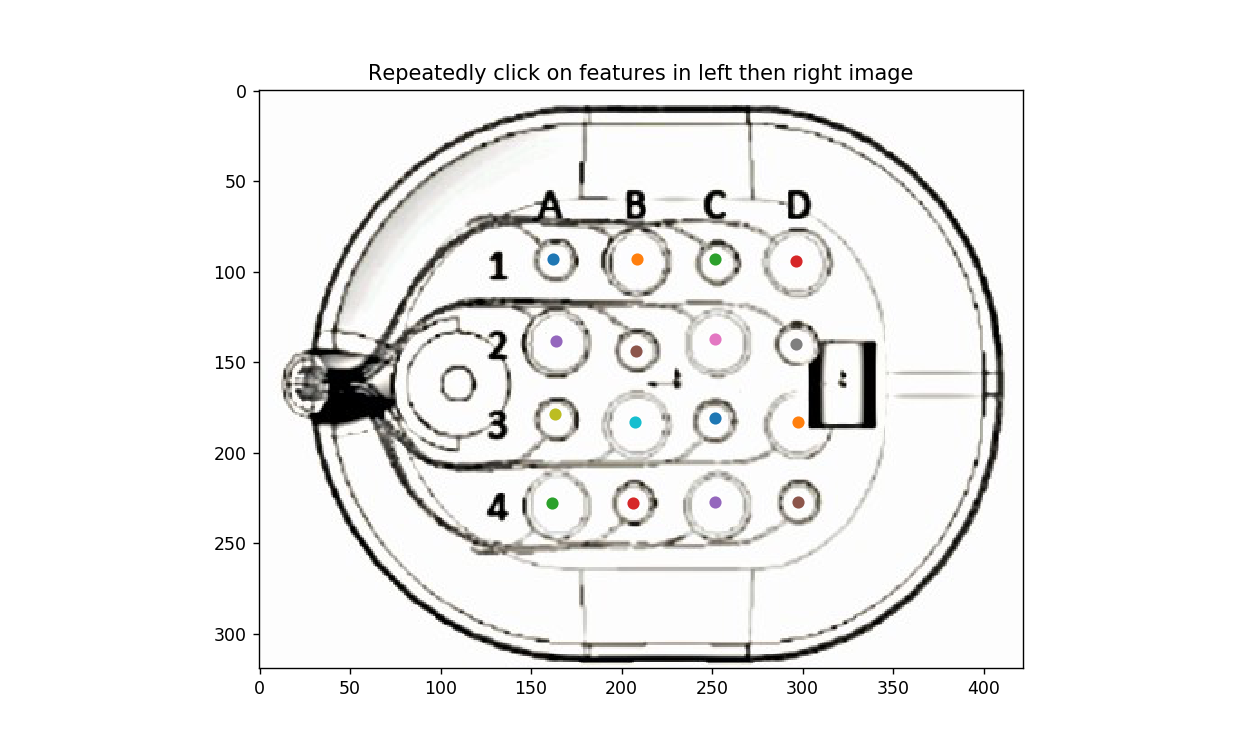

In [2]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
img = skio.imread('/home/mbeyeler/Dropbox/UW/argus_i.jpg')
ax1.imshow(img)
ax1.set_title('Repeatedly click on features in left then right image')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [4]:
np.array(collector)

array([[  93.12857037,  162.32202802],
       [  93.12857037,  208.58393279],
       [  93.12857037,  251.3934566 ],
       [  93.81904657,  296.27440898],
       [ 138.00952276,  163.7029804 ],
       [ 143.53333228,  207.8934566 ],
       [ 137.31904657,  251.3934566 ],
       [ 140.08095133,  296.27440898],
       [ 178.74761799,  163.01250421],
       [ 182.89047514,  207.2029804 ],
       [ 180.81904657,  251.3934566 ],
       [ 182.89047514,  297.65536136],
       [ 227.77142752,  161.63155183],
       [ 227.77142752,  206.51250421],
       [ 227.08095133,  251.3934566 ],
       [ 227.08095133,  297.65536136]])

In [69]:
subject = '28-106'
fbase = os.environ['MINNESOTA_DATA'] + '/28-106/34786_FernandoAmigonsosa_03-24-2016_SpectralisOCT4(Scans)(Ir_oct)_77_flipped.jpg'
fm24 = os.environ['MINNESOTA_DATA'] + '/28-106/34786_FernandoAmigonsosa_02-15-2018_SpectralisOCT3(Scans)(Ir_oct)_117_flipped.jpg'

In [4]:
img_combined, img1, img2 = combine_imgs(fbase, fm24)

In [5]:
img1_warped = img_combined[:, :img_combined.shape[1] // 2, :]

<IPython.core.display.Javascript object>


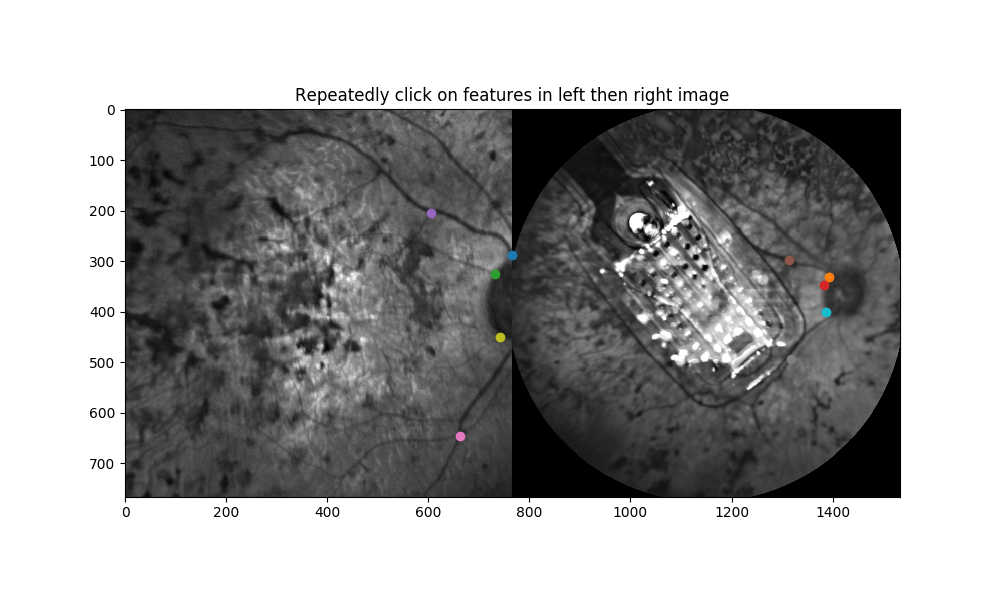

In [7]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img_combined)
ax1.set_title('Repeatedly click on features in left then right image')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [8]:
collector

[(288.17653225806453, 765.32475806451612),
 (331.7223387096775, 1392.7802419354837),
 (325.78427419354841, 731.67572580645162),
 (347.55717741935484, 1382.8834677419354),
 (205.04362903225808, 604.9970161290322),
 (298.07330645161289, 1313.6060483870967),
 (646.43975806451613, 662.39830645161294),
 (494.029435483871, 1317.5647580645159),
 (450.48362903225814, 741.57249999999999),
 (400.99975806451619, 1386.8421774193546)]

In [9]:
pts_source = np.array(collector[::2])
pts_target = np.array(collector[1::2])
pts_target[:, 1] -= img1_warped.shape[1]

In [15]:
tf = skit.estimate_transform('similarity', np.fliplr(pts_target), np.fliplr(pts_source))

In [16]:
img2_warped = skit.warp(img2, inverse_map=tf.inverse,
                        output_shape=img1_warped.shape)

In [17]:
mask = (img1_warped != 0) & (img2_warped != 0)

In [18]:
registered = img1_warped + img2_warped
registered[mask] /= 2

<IPython.core.display.Javascript object>


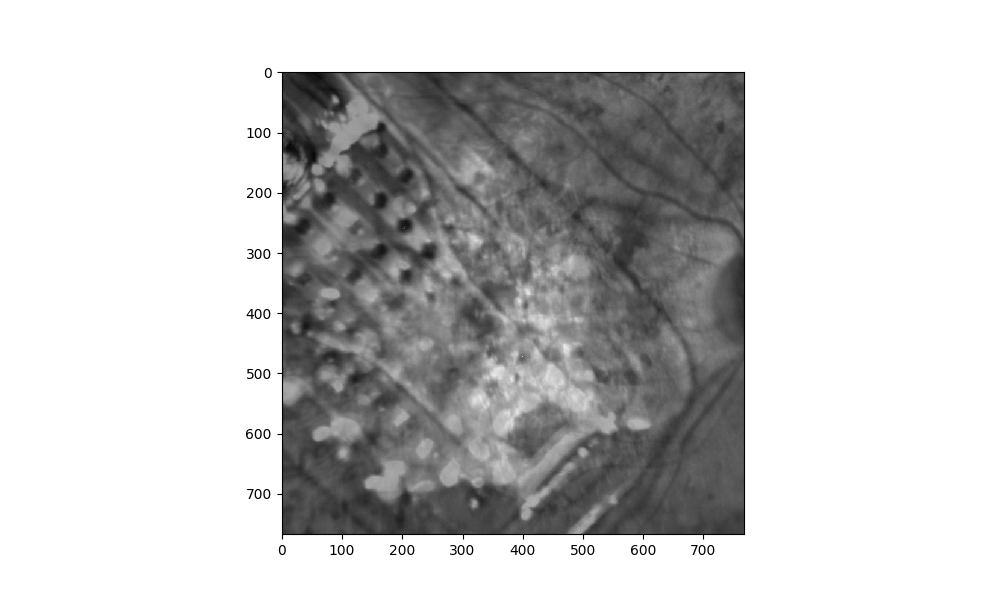

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(registered)
fig.savefig('%s-registered.png' % subject)

<IPython.core.display.Javascript object>


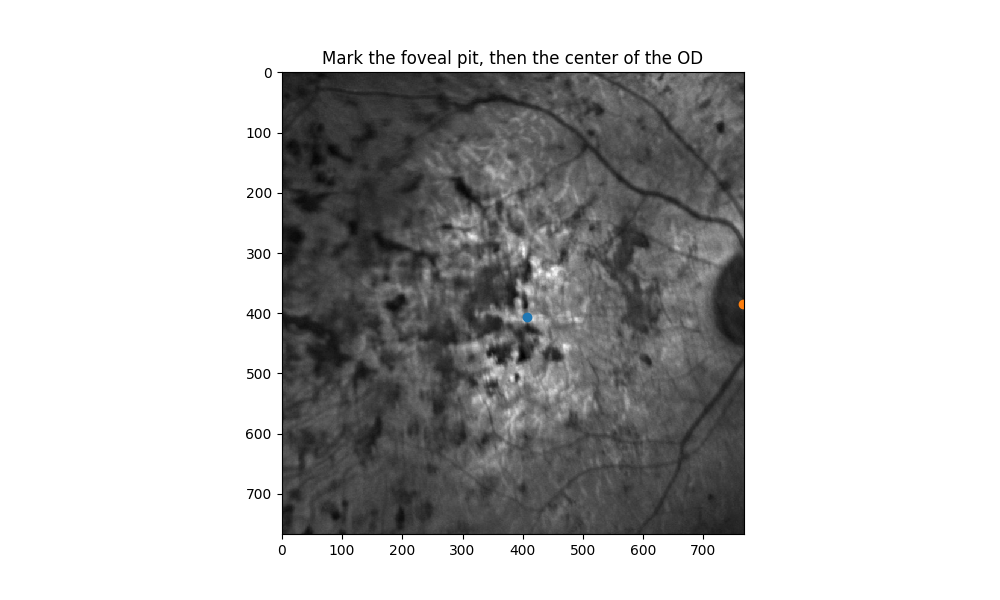

In [20]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img1_warped)
ax1.set_title('Mark the foveal pit, then the center of the OD')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [21]:
foveal_pit = collector[0]
optic_disc = collector[1]
foveal_pit, optic_disc

((406.29430465367966, 406.91686958874453),
 (384.71205357142856, 765.51427218614708))

<IPython.core.display.Javascript object>


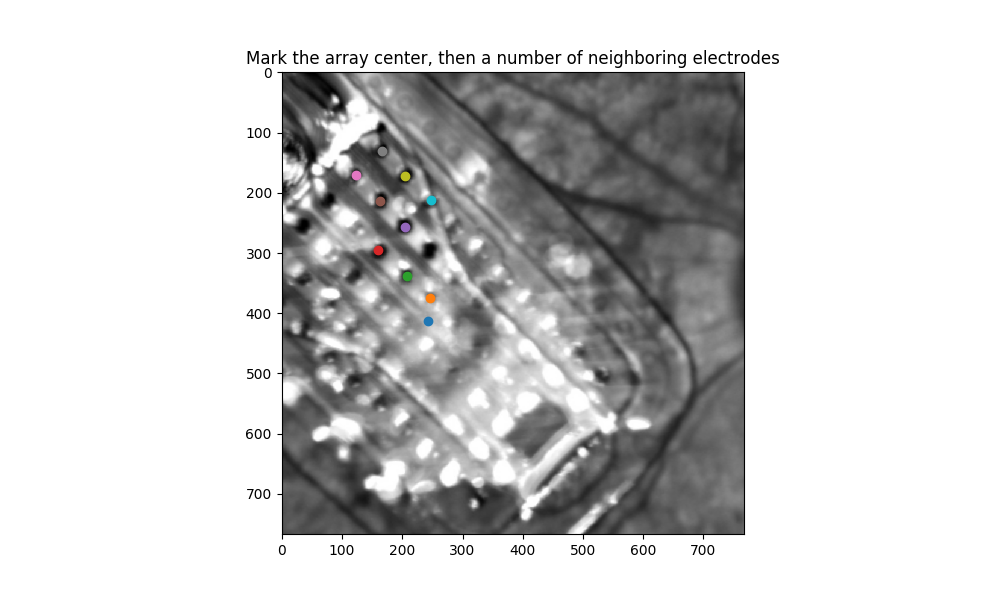

In [22]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img2_warped)
ax1.set_title('Mark the array center, then a number of neighboring electrodes')
# ax1.text(0, 0, 'base image', color='w',
#          horizontalalignment='left',
#          verticalalignment='top')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [23]:
arr_center = collector[0]
eloc = np.array(collector[1:])

In [24]:
eldist = np.mean(np.sqrt(np.diff(eloc[:, 0]) ** 2 + np.diff(eloc[:, 1]) ** 2))
eldist

58.611465043984822

<IPython.core.display.Javascript object>


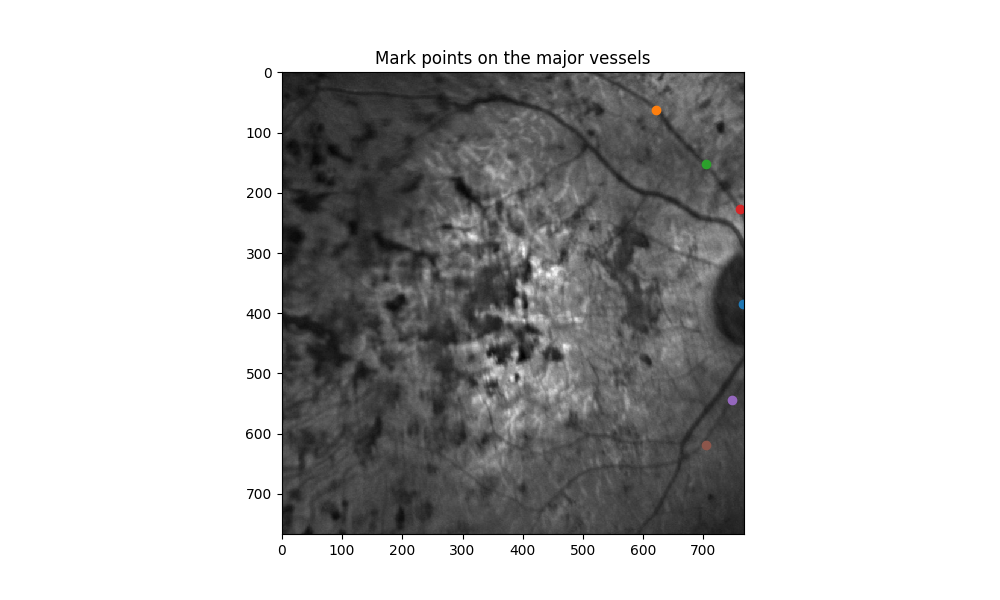

In [35]:
fig = plt.figure(figsize=(10, 6))
ax11 = fig.add_subplot(111)
ax11.imshow(img1_warped)
ax11.plot(optic_disc[1], optic_disc[0], 'o')
ax11.set_title('Mark points on the major vessels')
# ax1.text(0, 0, 'base image', color='w',
#          horizontalalignment='left',
#          verticalalignment='top')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.xdata, event.ydata))
    ax11.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [36]:
vertex = optic_disc[::-1]
vessel = collector
vessel

[(621.07920725108215, 63.157264610389575),
 (704.08786525974006, 152.80661525974028),
 (760.53375270562765, 227.51440746753246),
 (747.25236742424227, 544.60748106060601),
 (704.08786525974006, 619.31527326839819)]

In [37]:
def rmse(x, pts, vertex):
    a, theta = x
    mse = 0
    for p in pts:
        y = (p[0] - vertex[0]) * np.sin(theta) + (p[1] - vertex[1]) * np.cos(theta)
        x = (p[0] - vertex[0]) * np.cos(theta) - (p[1] - vertex[1]) * np.sin(theta)
        mse += (a * y ** 2 - x) ** 2
    return np.sqrt(mse)

In [38]:
from scipy.optimize import minimize
ret = minimize(rmse, [0, 0], args=(vessel, vertex), method='Nelder-Mead')
ret

 final_simplex: (array([[-0.00119438,  0.01998829],
       [-0.00119479,  0.01999389],
       [-0.00119444,  0.02006306]]), array([ 32.64299806,  32.64304395,  32.64305779]))
           fun: 32.642998055277815
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 43
        status: 0
       success: True
             x: array([-0.00119438,  0.01998829])

In [39]:
best_a, best_theta = ret['x']
best_raphe = np.array([-np.cos(best_theta), np.sin(best_theta)])
best_a, np.rad2deg(best_theta)

(-0.0011943806392641604, 1.1452449366796689)

In [40]:
def find_x(pt_x, pt_y, vertex, a, theta):
    y = (pt_x - vertex[0]) * np.sin(theta) + (pt_y - vertex[1]) * np.cos(theta)
    x = (pt_x - vertex[0]) * np.cos(theta) - (pt_y - vertex[1]) * np.sin(theta)
    return (a * y ** 2 - x) ** 2

In [41]:
y_para = np.linspace(50, 680, 31)
x_para = []
for yy in y_para:
    r = minimize(find_x, 0, args=(yy, vertex, best_a, best_theta), method='Nelder-Mead')
    x_para.append(r['x'][0])

In [42]:
def dist(p, l1, l2):
    x0, y0 = p
    x1, y1 = l1
    x2, y2 = l2
    numer = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denom = np.sqrt((y2-y1)**2 + (x2-x1)**2)
    return numer / denom

In [43]:
proj_foveal_pit = dist(foveal_pit[::-1], vertex, vertex + best_raphe) * np.array([-best_raphe[1], best_raphe[0]])
proj_foveal_pit += foveal_pit[::-1]

<IPython.core.display.Javascript object>


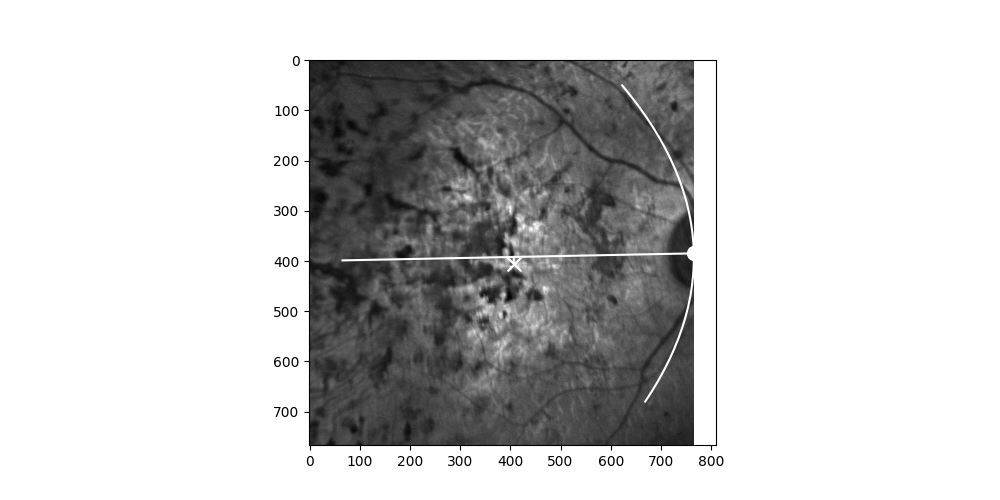

In [44]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.imshow(img1_warped, cmap='gray')
ax.plot(x_para, y_para, 'w')
ax.plot([vertex[0], vertex[0] + 700 * best_raphe[0]],
        [vertex[1], vertex[1] + 700 * best_raphe[1]], 'w')
ax.scatter(vertex[0], vertex[1], c='w', s=100, marker='o')
ax.scatter(foveal_pit[1], foveal_pit[0], c='w', s=100, marker='x')
ax.plot([proj_foveal_pit[0], foveal_pit[1]], [proj_foveal_pit[1], foveal_pit[0]], 'w--')
plt.savefig('%s-raphe-fovea.png' % subject)

In [45]:
euclid = skit.EuclideanTransform(rotation=best_theta)

In [46]:
rf_foveal_pit = euclid(foveal_pit[::-1])[0]
rf_proj_foveal_pit = euclid(proj_foveal_pit)[0]
rf_vertex = euclid(vertex)[0]
rf_arr_center = euclid(arr_center[::-1])[0]
rf_eloc = euclid(np.fliplr(eloc))

In [47]:
x_px = np.sqrt((vertex[0] - proj_foveal_pit[0]) ** 2 + (vertex[1] - proj_foveal_pit[1]) ** 2)
y_px = np.sqrt((proj_foveal_pit[0] - foveal_pit[1]) ** 2 + (proj_foveal_pit[1] - foveal_pit[0]) ** 2)

rf_x_px = np.sqrt((rf_vertex[0] - rf_proj_foveal_pit[0]) ** 2 + (rf_vertex[1] - rf_proj_foveal_pit[1]) ** 2)
rf_y_px = np.sqrt((rf_proj_foveal_pit[0] - rf_foveal_pit[0]) ** 2 + (rf_proj_foveal_pit[1] - rf_foveal_pit[1]) ** 2)

assert np.isclose(x_px, rf_x_px)
assert np.isclose(y_px, rf_y_px)

In [48]:
export_loc_od = p2p.retina.ret2dva(x_px / eldist * 525), p2p.retina.ret2dva(y_px / eldist * 525)
print('Center of optic nerve head in deg from the foveal pit:')
export_loc_od

Center of optic nerve head in deg from the foveal pit:


(11.84088153664082, 0.45999322108237412)

In [49]:
print('Array center in um from the foveal pit:')
export_arr_center = (rf_arr_center - rf_foveal_pit) * np.array([525 / eldist, -525 / eldist])
export_arr_center

Array center in um from the foveal pit:


array([-1473.16399857,   -33.76295495])

In [50]:
angles = []
for j in range(1, rf_eloc.shape[0]):
    v1 = rf_eloc[j - 1, :] - rf_eloc[j, :]
    v2 = [1, 0]
    angle = np.rad2deg(np.arccos(np.dot(v1, v2) / np.linalg.norm(v1) / np.linalg.norm(v2)))
    if angle > 90:
        angle = 180 - angle
    if angle > 45:
        angle = 90 - angle
    angles.append(angle)
angles

[44.872214916622909,
 43.023114474563933,
 39.280833803419512,
 42.731452349244911,
 41.564145020681835,
 41.564145020681707,
 41.468811032931541,
 43.854634894041169]

In [51]:
print('Array orientation in rad and deg:')
export_rot = -np.deg2rad(np.mean(angles))
export_rot, np.rad2deg(export_rot)

Array orientation in rad and deg:


(-0.73818559235006587, -42.294918939023439)

In [52]:
argus = p2p.implants.ArgusII(x_center=export_arr_center[0],
                             y_center=export_arr_center[1],
                             rot=export_rot)

2018-02-26 13:09:33,328 [pulse2percept.implants] [WARNING] Distance to fovea=4145 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,330 [pulse2percept.implants] [WARNING] Distance to fovea=3723 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,332 [pulse2percept.implants] [WARNING] Distance to fovea=3329 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,334 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,335 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,337 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:09:33,339 [pulse2percept.implants] [WARNING] Distance to

In [54]:
sim = p2p.Simulation(argus)

In [56]:
sim.set_optic_fiber_layer(sampling=506, loc_od=export_loc_od)

2018-02-26 13:10:01,790 [pulse2percept.retina] [INFO] Generating new file './retina_RE_s506_a501_r801_7000x7000.npz'.


<IPython.core.display.Javascript object>


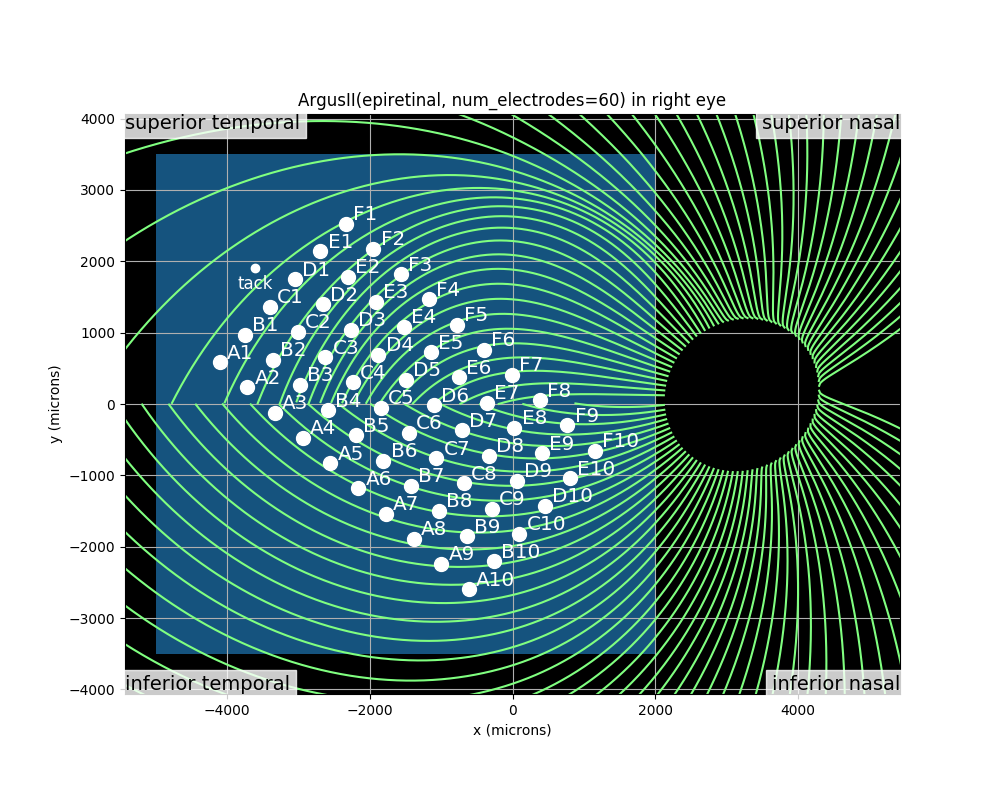

In [57]:
fig, ax = sim.plot_fundus()
ax.grid('on', which='major')
fig.savefig('%s-sim.png' % subject)

In [58]:
rf_img = skit.warp(registered, euclid.inverse)

<IPython.core.display.Javascript object>


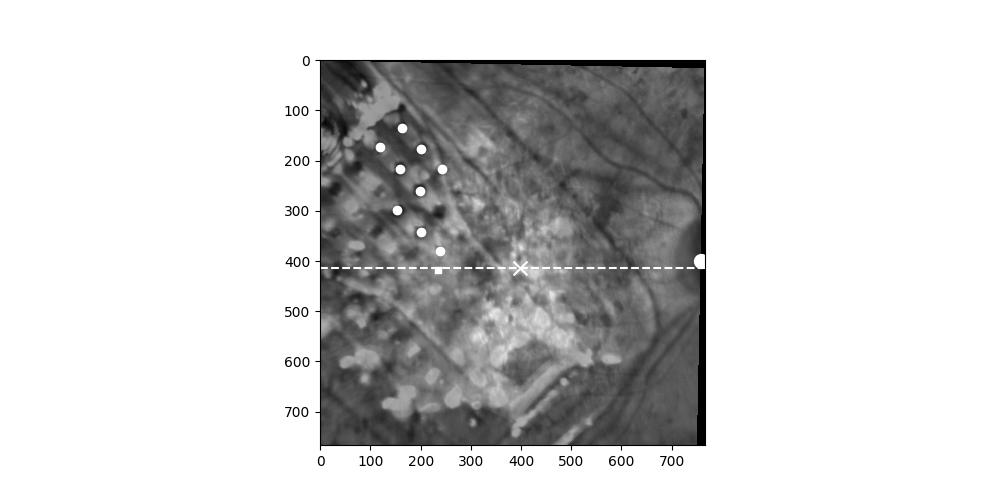

In [59]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.imshow(rf_img, cmap='gray')
ax.plot(rf_eloc[:, 0], rf_eloc[:, 1], 'ow')
ax.scatter(rf_vertex[0], rf_vertex[1], c='w', s=100, marker='o')
ax.scatter(rf_foveal_pit[0], rf_foveal_pit[1], c='w', s=100, marker='x')
ax.scatter(rf_arr_center[0], rf_arr_center[1], c='w', s=20, marker='s')
ax.plot([0, registered.shape[1] - 1], [rf_foveal_pit[1], rf_foveal_pit[1]], 'w--')
fig.savefig('%s-registered-annot.png' % subject)

## Results

In [53]:
print('Center of optic nerve head in deg from the foveal pit:', export_loc_od)
print('Array center in um from the foveal pit:', export_arr_center)
print('Array orientation in rad and deg:', export_rot, np.rad2deg(export_rot))

Center of optic nerve head in deg from the foveal pit: (11.84088153664082, 0.45999322108237412)
Array center in um from the foveal pit: [-1473.16399857   -33.76295495]
Array orientation in rad and deg: -0.73818559235 -42.294918939


In [71]:
argus_LE = p2p.implants.ArgusII(x_center=-export_arr_center[0],
                             y_center=export_arr_center[1],
                             rot=-export_rot,
                             eye='LE')
sim = p2p.Simulation(argus_LE)

2018-02-26 13:24:37,207 [pulse2percept.implants] [WARNING] Distance to fovea=4145 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,208 [pulse2percept.implants] [WARNING] Distance to fovea=3723 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,210 [pulse2percept.implants] [WARNING] Distance to fovea=3329 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,211 [pulse2percept.implants] [WARNING] Distance to fovea=3875 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,212 [pulse2percept.implants] [WARNING] Distance to fovea=3419 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,213 [pulse2percept.implants] [WARNING] Distance to fovea=3660 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2018-02-26 13:24:37,215 [pulse2percept.implants] [WARNING] Distance to

In [72]:
sim.set_optic_fiber_layer(sampling=506, loc_od=(-export_loc_od[0], export_loc_od[1]))

2018-02-26 13:24:38,091 [pulse2percept.retina] [INFO] Loading file "./retina_LE_s506_a501_r801_7000x7000.npz".


<IPython.core.display.Javascript object>


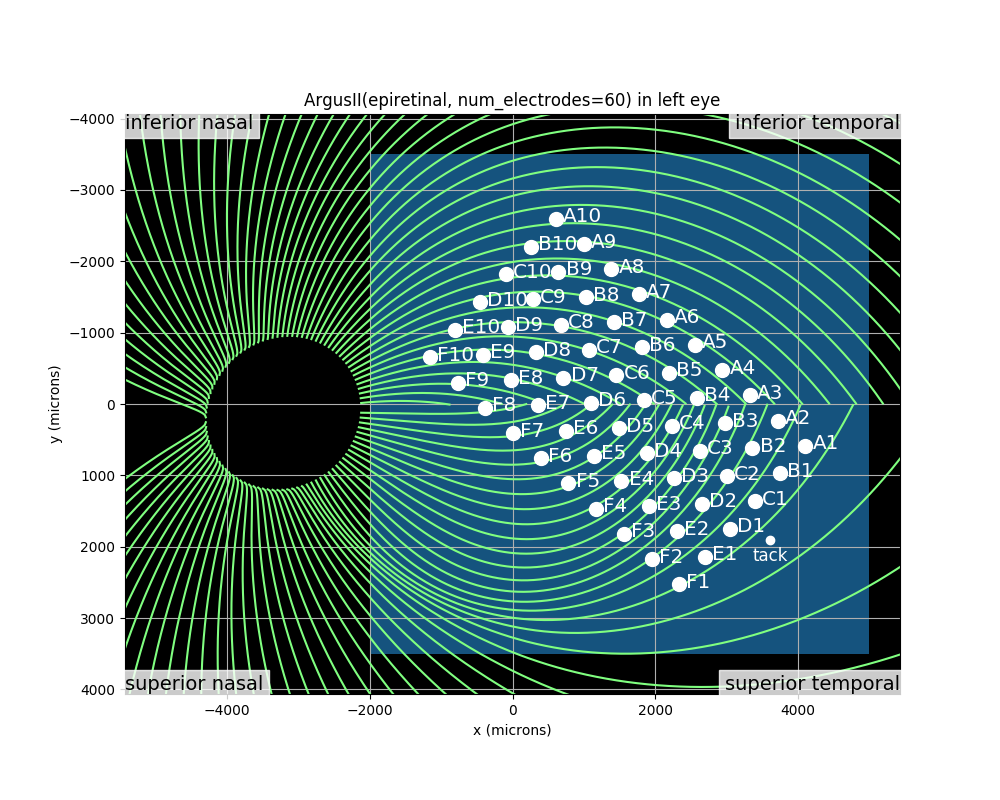

In [75]:
fig, ax = sim.plot_fundus(upside_down=True)
ax.grid('on', which='major')
fig.savefig('%s-sim.png' % subject)